# Figure 1: SLF curves for base and fitted models

### Add paths to run locally or off NIRD

In [1]:
import sys
# Add common resources folder to path
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/Common/")
sys.path.append("/mnt/mcc-ns9600k/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/")
sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims,
    to_png
    )

from classes import SatComp_Metric, CT_SLF_Metric
from collections import deque
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Check running location and adjust working directory appropriately.

In [2]:
host = os.uname()[1]
if 'jupyter' in host.split('-'): # Check if running on NIRD through the Jupyter Hub
    print('Running through MC2 Jupyter Hub')
    model_dir = '/mnt/mcc-ns9600k/jonahks/'
    os.chdir(model_dir)

else:  # Assume that we're running on a local machine and mounting NIRD
    print('Running on %s, attempting to mount ns9600k/jonahks/ from NIRD' % str(host))
    os.system('fusermount -zu ~/drivemount/')  # unmount first
    os.system('sshfs jonahks@login.nird.sigma2.no:"p/jonahks/" ~/drivemount/')    # Calling mountnird from .bashrc doesn't work
    os.chdir('/home/jonahks/drivemount/')
    save_dir = '~/DATAOUT/'
    save_to = os.path.expanduser(save_dir)

output_dir = 'figures/'
case_dir = 'satcomp/'   # inconsistent label compared to jupy_test
conv_dir ='convectivephase/'

# Check that each important directory can be accessed:    
access_paths = os.path.exists(output_dir) and os.path.exists(case_dir) and os.path.exists(conv_dir)
print('Can access all directory paths:', access_paths)

Running through MC2 Jupyter Hub
Can access all directory paths: True


## Load data into metric classes

In [3]:
basemetric_slf = CT_SLF_Metric(case_dir)

basemetric_slf.add_case('20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1', label="CAM6-Oslo")
basemetric_slf.add_case('CESM2_slfvars', label="CAM6")
basemetric_slf.add_case('20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1', label="CAM6-OsloIce")

Trying to load concatenated file for 20200504_145018_fitting_runs_cam6satcomp_wbf_1_inp_1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for CESM2_slfvars


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Trying to load concatenated file for 20200414_205148_singleparam_cam61satcomp_wbf_1_inp_1


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


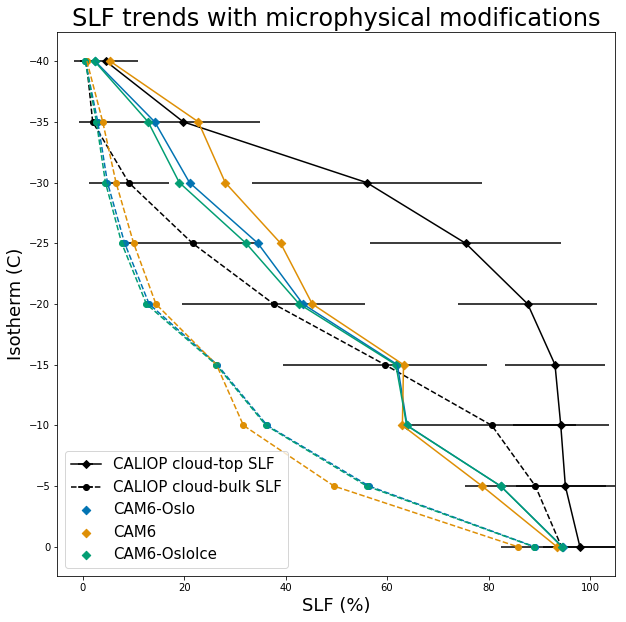

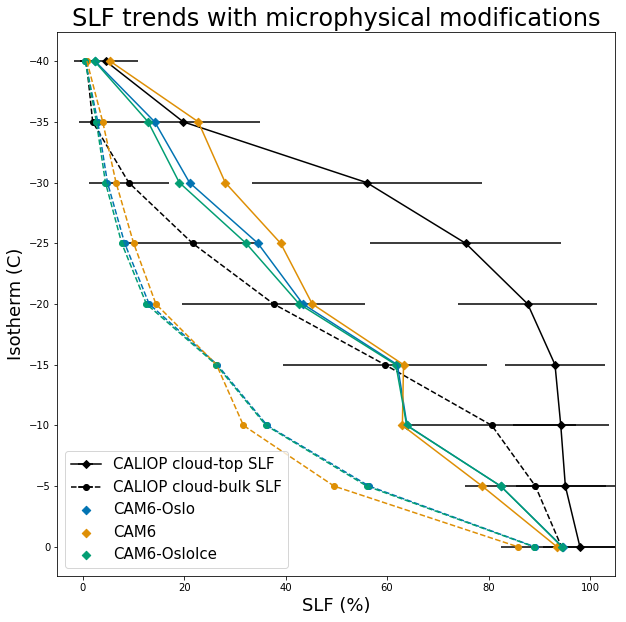

In [4]:
basemetric_slf.plot_isos_all(lat_range=[-90,90])

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


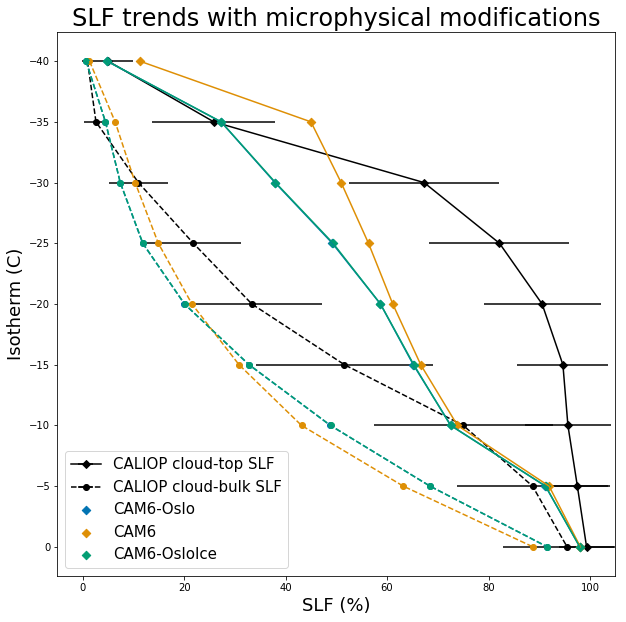

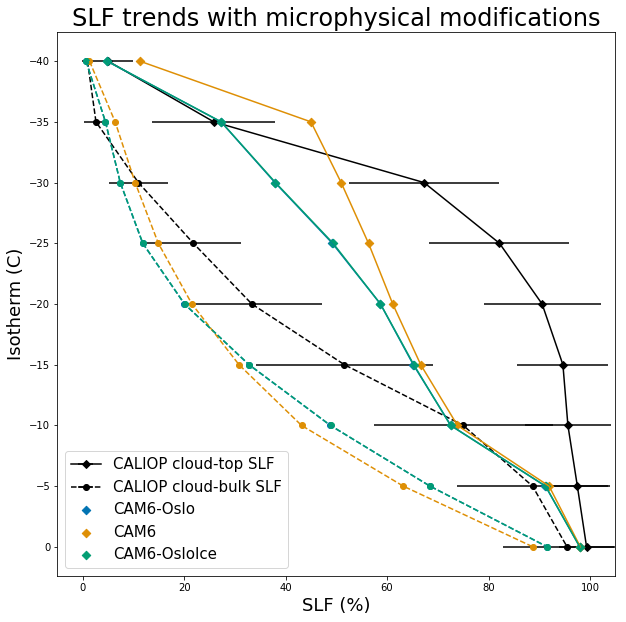

In [5]:
basemetric_slf.plot_isos_all(lat_range=[-90,-30])

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


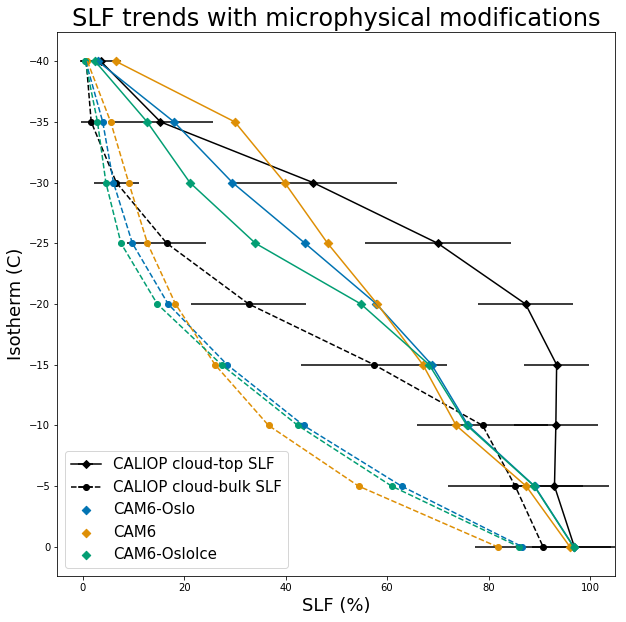

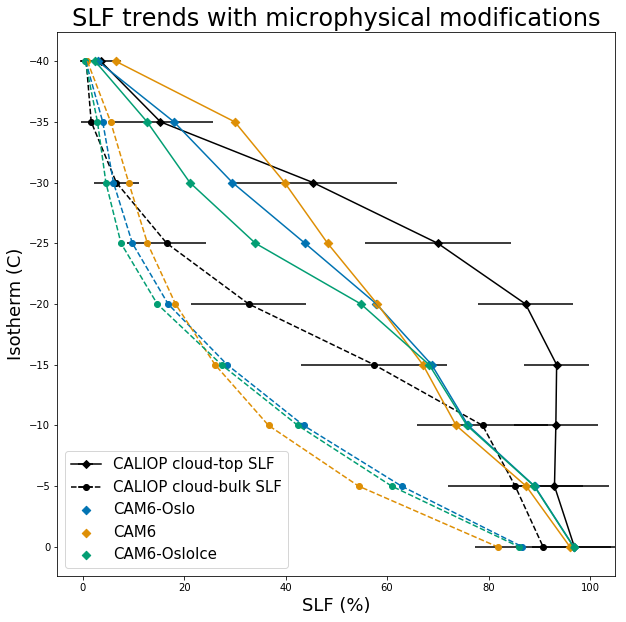

In [6]:
basemetric_slf.plot_isos_all(lat_range=[30,90])

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


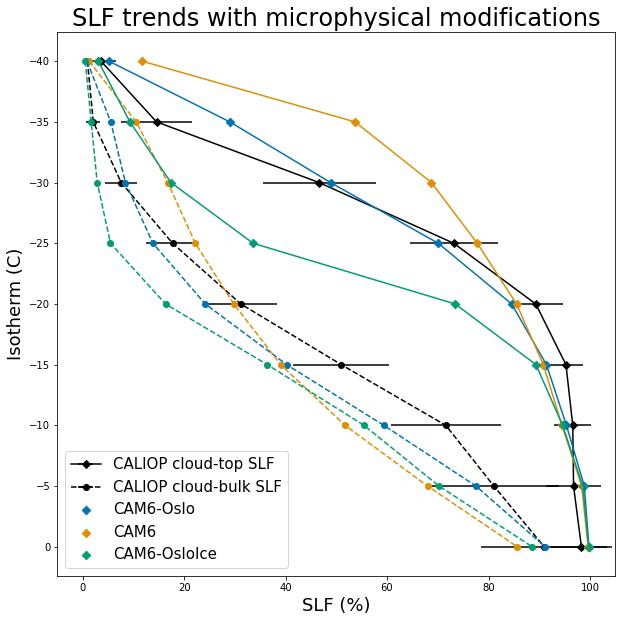

In [7]:
plot = basemetric_slf.plot_isos_all(lat_range=[60,90])

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


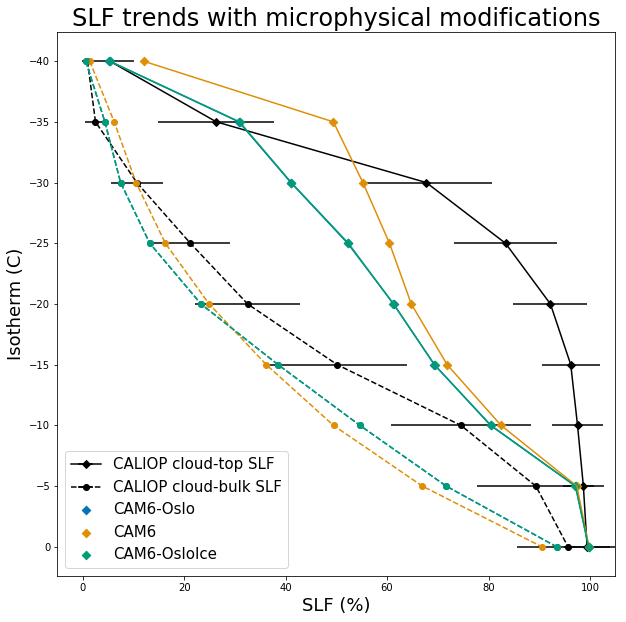

In [8]:
plot = basemetric_slf.plot_isos_all(lat_range=[-70,-40])

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.85,0.8,'b.')

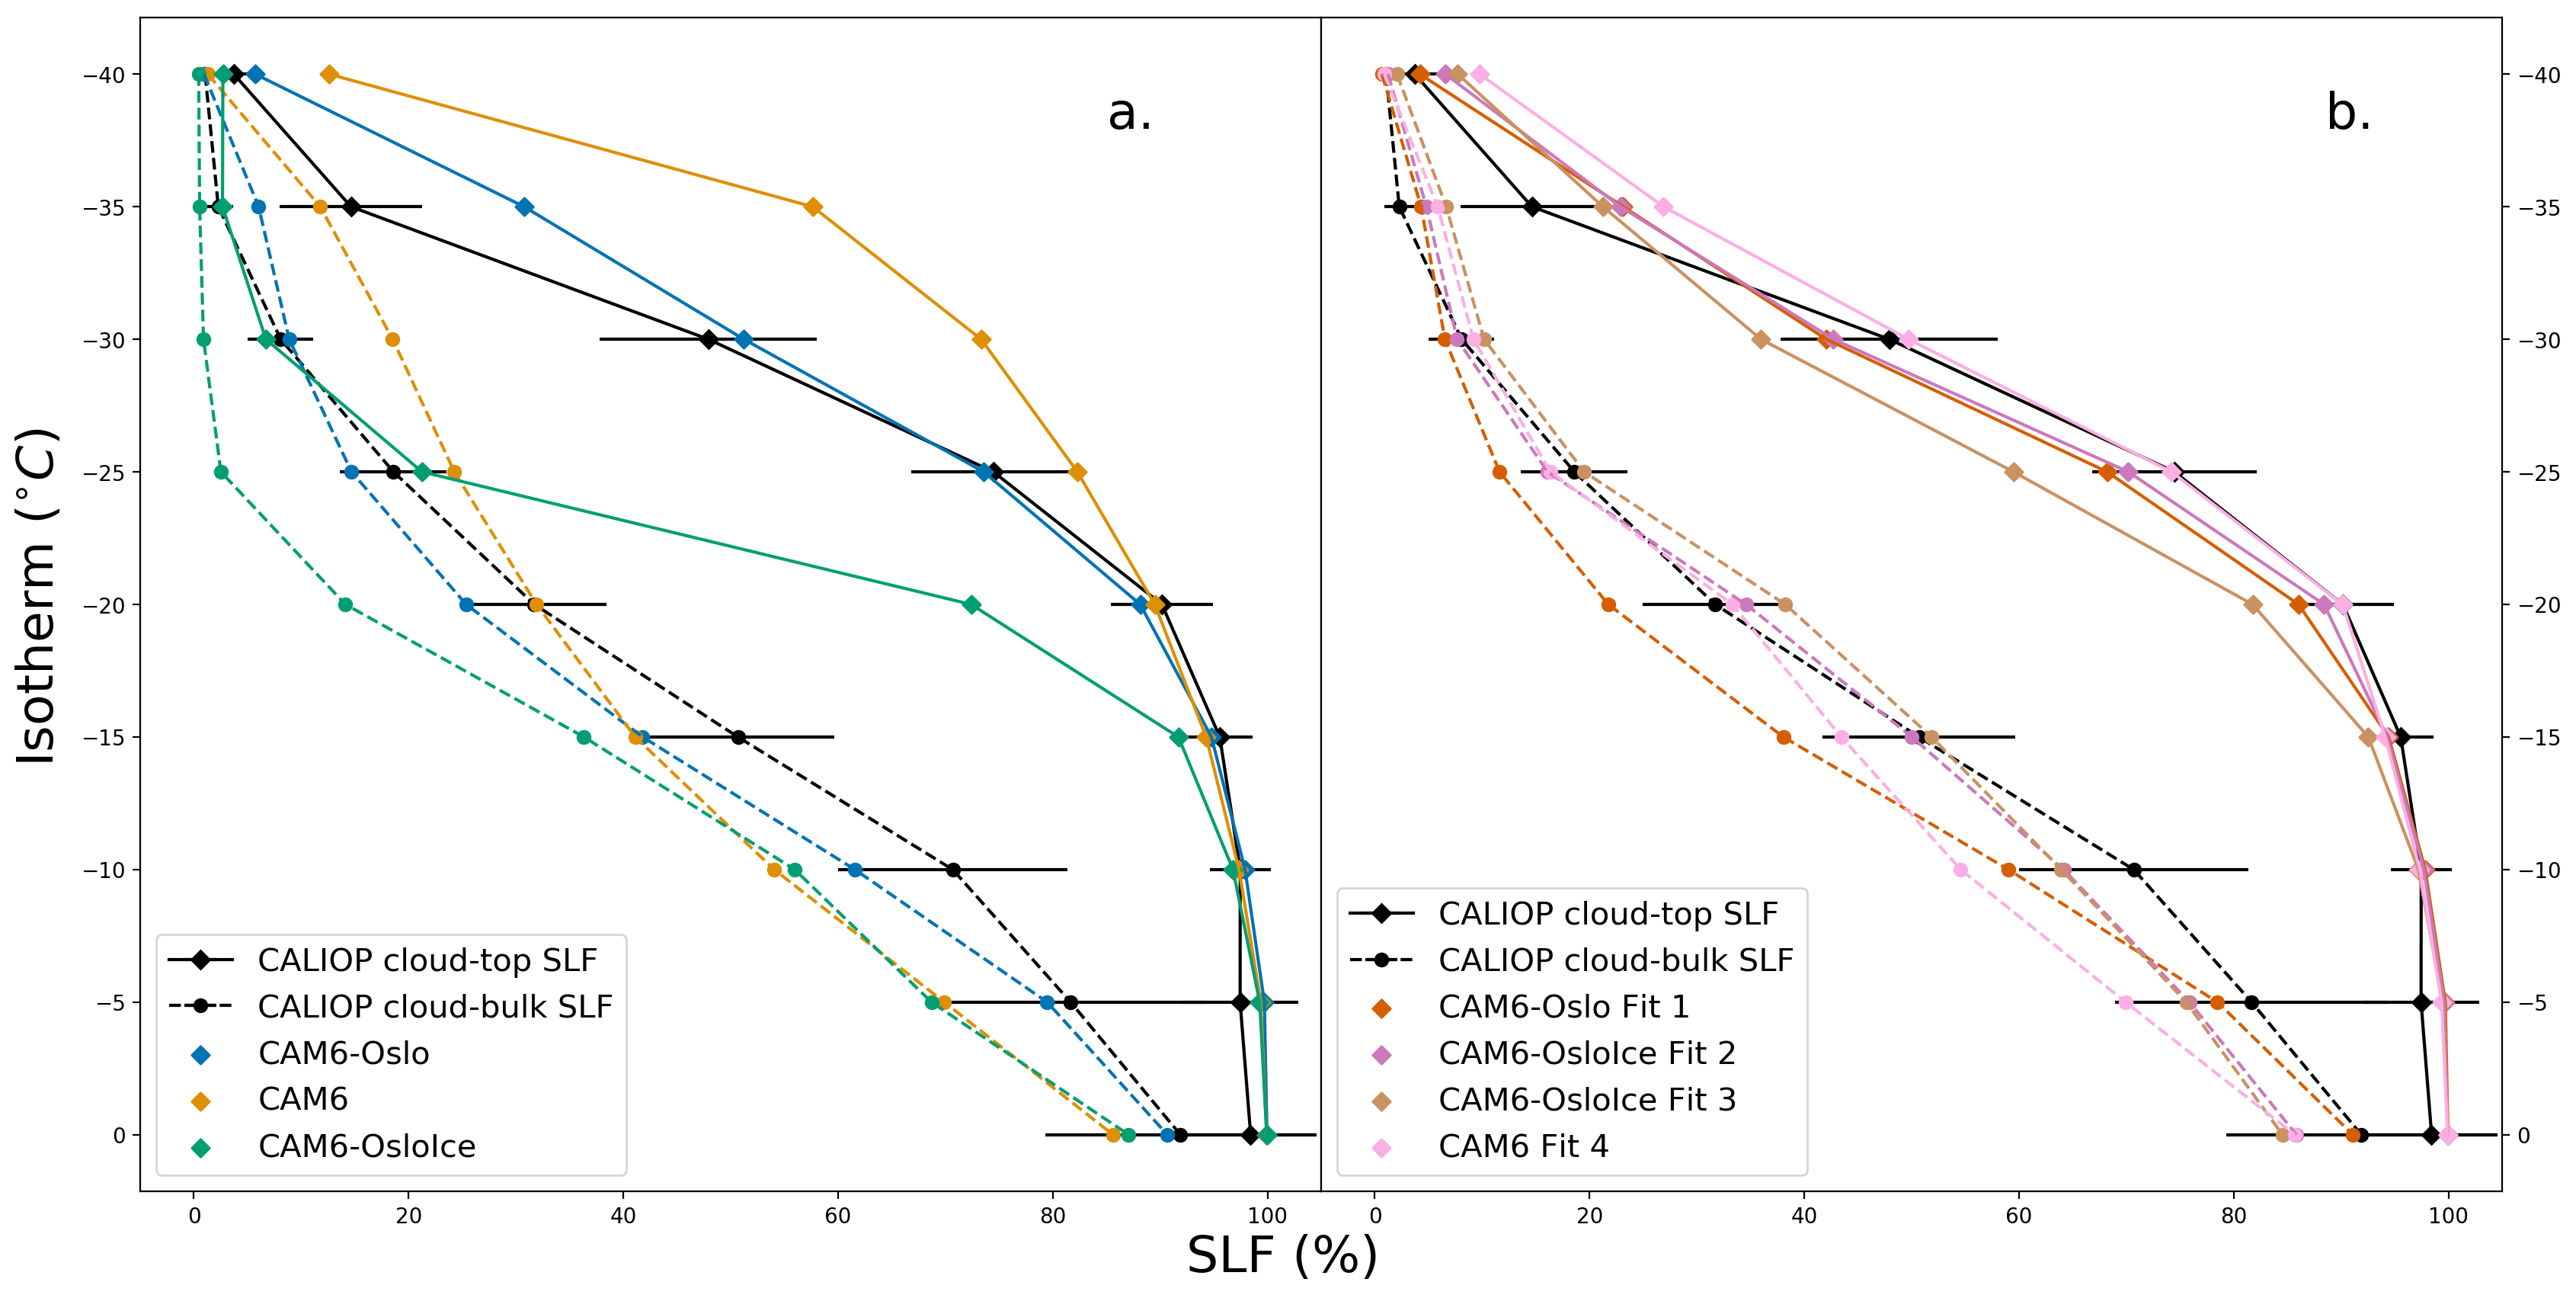

In [5]:
# Use different colors for the two subplots. Use the Seaborn colorblind palette (really pretty!)
plt.style.use('default')
basemetric_slf.colors = sns.color_palette("colorblind")[:3] 
fitmetric_slf.colors = sns.color_palette("colorblind")[3:]

fig,axs = plt.subplots(nrows=1,ncols=2)#,sharey=True)
fig.set_figheight(10)
fig.set_figwidth(20)
fig.set_dpi(200)

# axs[0].invert_yaxis()
o = basemetric_slf.plot_isos_all(ax=axs[0])

# axs[1].invert_yaxis()
oo = fitmetric_slf.plot_isos_all(ax=axs[1])

fig.subplots_adjust(wspace=0.0)

axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[0].set_title('')
axs[1].set_title('')
# axs[1].set_yticks(np.arange(-40,0,5),' ')
# axs[1].get_yaxis().set_ticks([])
axs[1].yaxis.tick_right()
# axs[1].set_yticklabels([])
# axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=15)
# axs[1].set_xticklabels(axs[1].get_xticklabels(), fontsize=15)
# axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=15)
# axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=15)
# handles, labels = axs[1].get_legend_handles_labels()
# axs[1].legend(handles, labels, loc = 'lower left')

fig.text(0.1, 0.5, r'Isotherm ($^{\circ}C$)', va='bottom', ha='center', rotation='vertical', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.5, 0.05, 'SLF (%)', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

# fig.text(0.15, 0.2, 'a.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.55, 0.2, 'b.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)

fig.text(0.45, 0.8, 'a.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.85, 0.8, 'b.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.85,0.8,'b.')

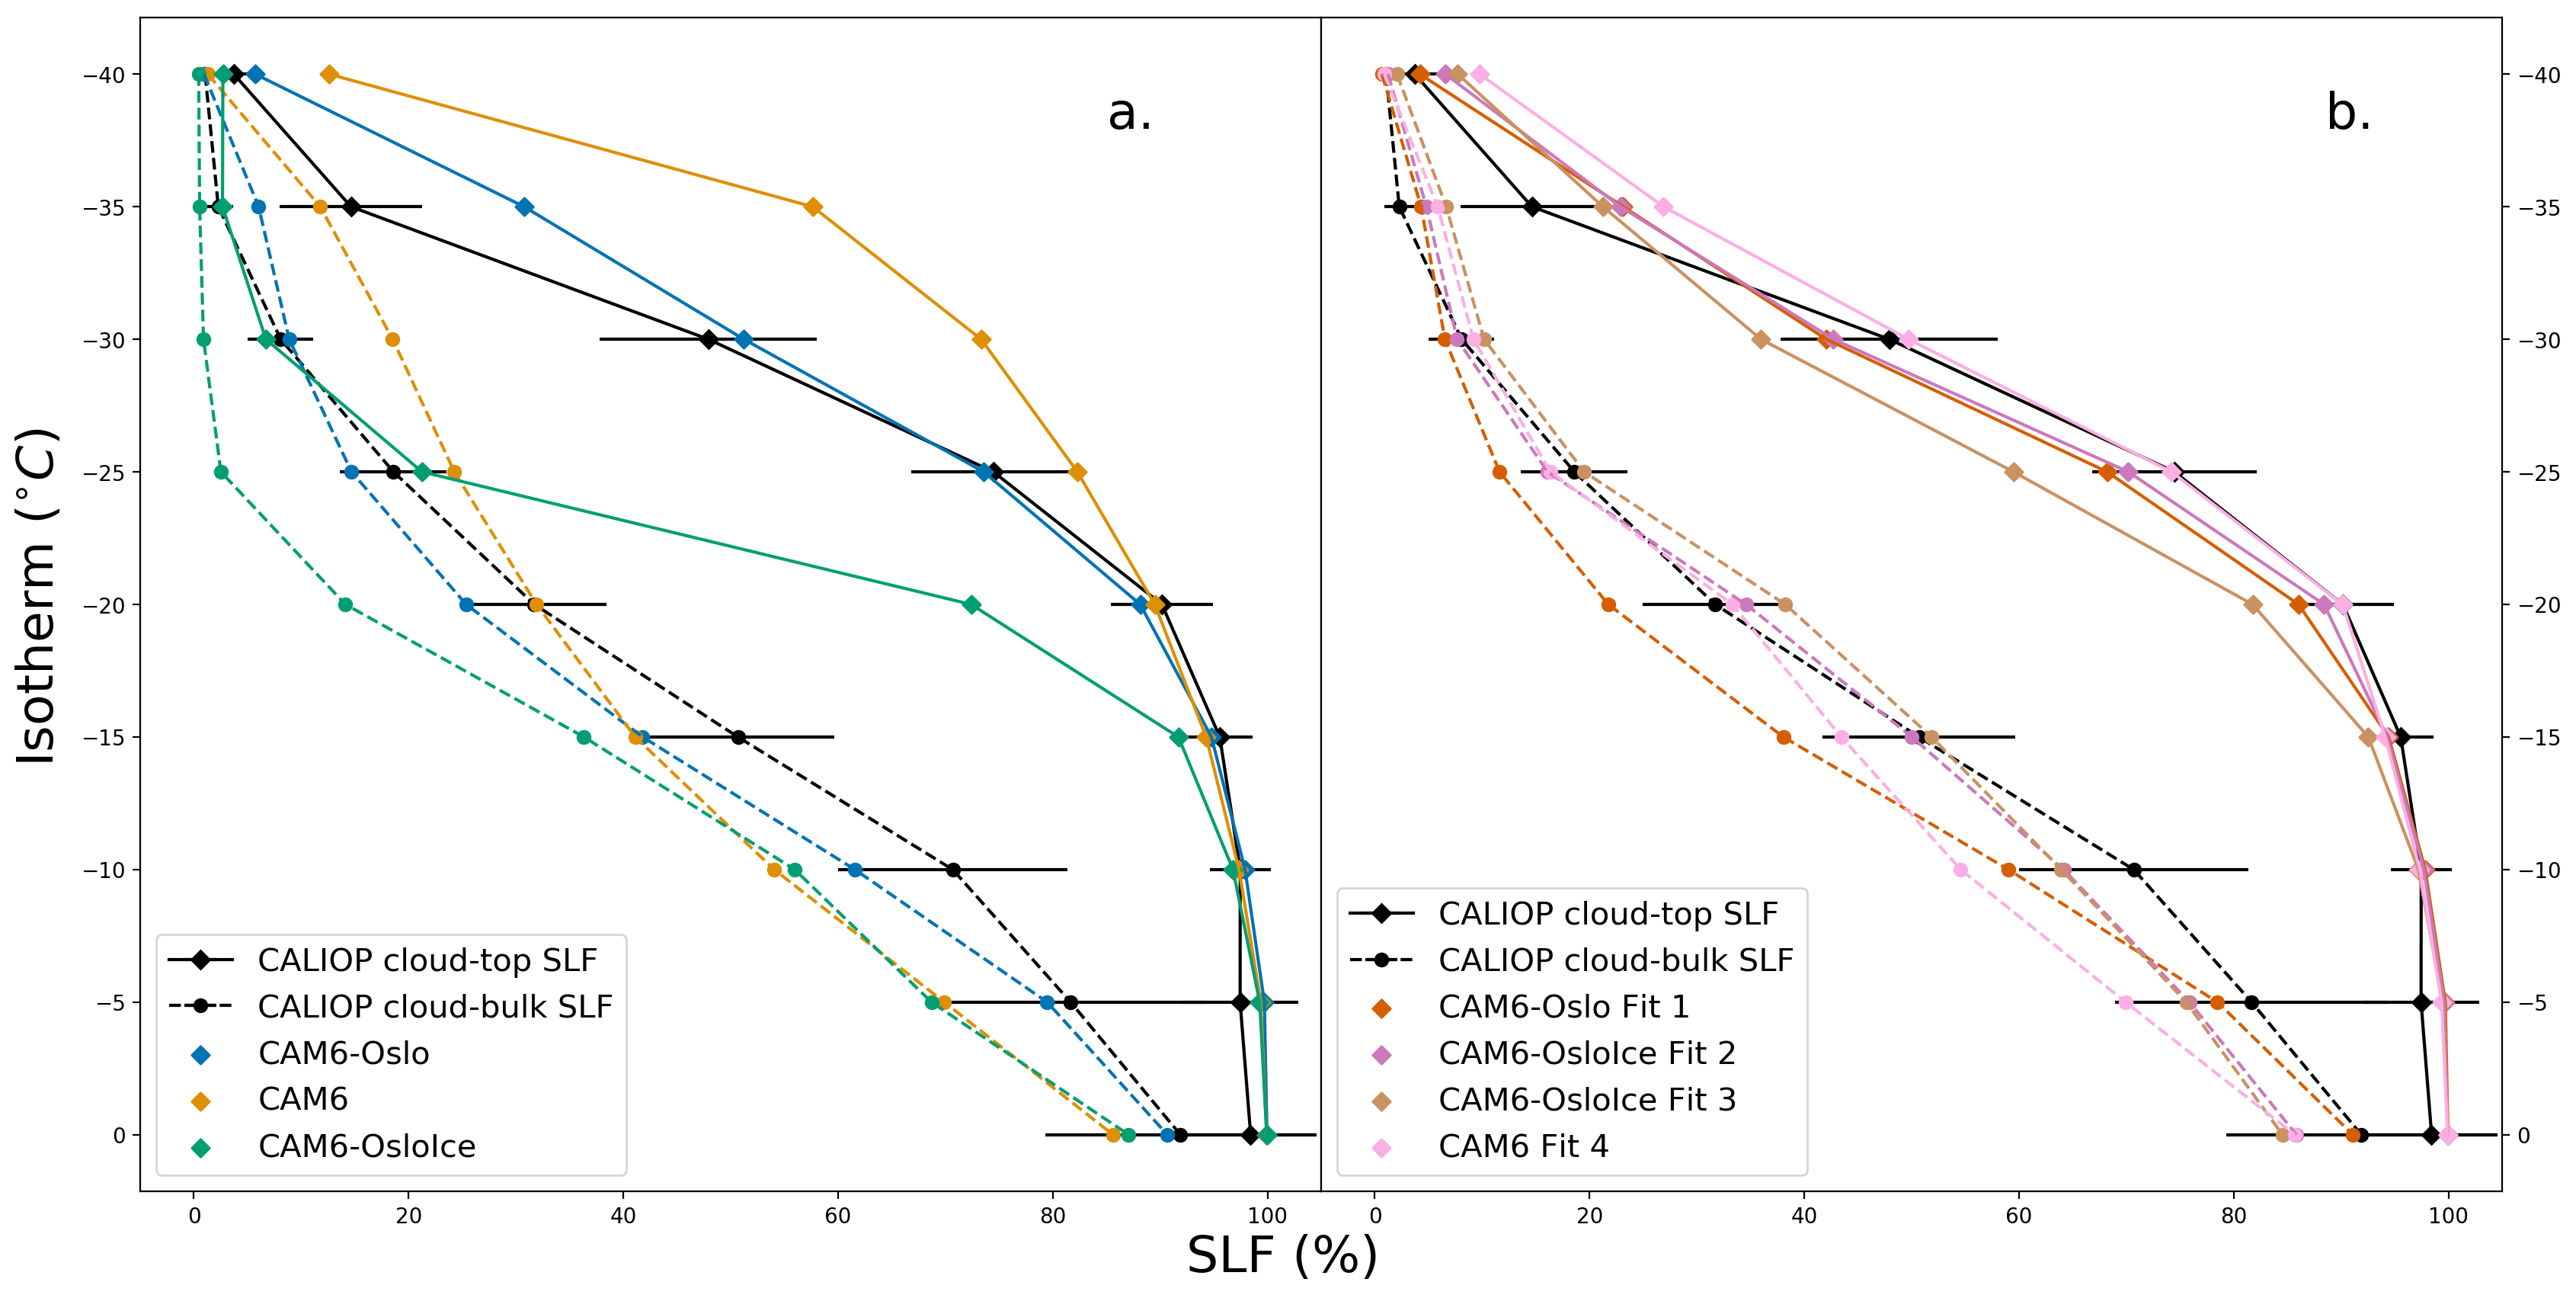

In [16]:
# Use different colors for the two subplots. Use the Seaborn colorblind palette (really pretty!)
plt.style.use('default')
basemetric_slf.colors = sns.color_palette("colorblind")[:3] 
fitmetric_slf.colors = sns.color_palette("colorblind")[3:]

fig,axs = plt.subplots(nrows=1,ncols=2)#,sharey=True)
fig.set_figheight(10)
fig.set_figwidth(20)
fig.set_dpi(200)

# axs[0].invert_yaxis()
o = basemetric_slf.plot_isos_all(ax=axs[0])

# axs[1].invert_yaxis()
oo = fitmetric_slf.plot_isos_all(ax=axs[1])

fig.subplots_adjust(wspace=0.0)

axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[0].set_title('')
axs[1].set_title('')
# axs[1].set_yticks(np.arange(-40,0,5),' ')
# axs[1].get_yaxis().set_ticks([])
axs[1].yaxis.tick_right()
# axs[1].set_yticklabels([])
# axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=15)
# axs[1].set_xticklabels(axs[1].get_xticklabels(), fontsize=15)
# axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=15)
# axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=15)
# handles, labels = axs[1].get_legend_handles_labels()
# axs[1].legend(handles, labels, loc = 'lower left')

fig.text(0.1, 0.5, r'Isotherm ($^{\circ}C$)', va='bottom', ha='center', rotation='vertical', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.5, 0.05, 'SLF (%)', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

# fig.text(0.15, 0.2, 'a.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.55, 0.2, 'b.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)

fig.text(0.45, 0.8, 'a.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.85, 0.8, 'b.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

In [17]:
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=15)
axs[1].set_xticklabels(axs[1].get_xticklabels(), fontsize=15)
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=15)
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=15)

[Text(1,-45,'−45'),
 Text(1,-40,'−40'),
 Text(1,-35,'−35'),
 Text(1,-30,'−30'),
 Text(1,-25,'−25'),
 Text(1,-20,'−20'),
 Text(1,-15,'−15'),
 Text(1,-10,'−10'),
 Text(1,-5,'−5'),
 Text(1,0,'0'),
 Text(1,5,'5')]

/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/opt/conda/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.85,0.8,'b.')

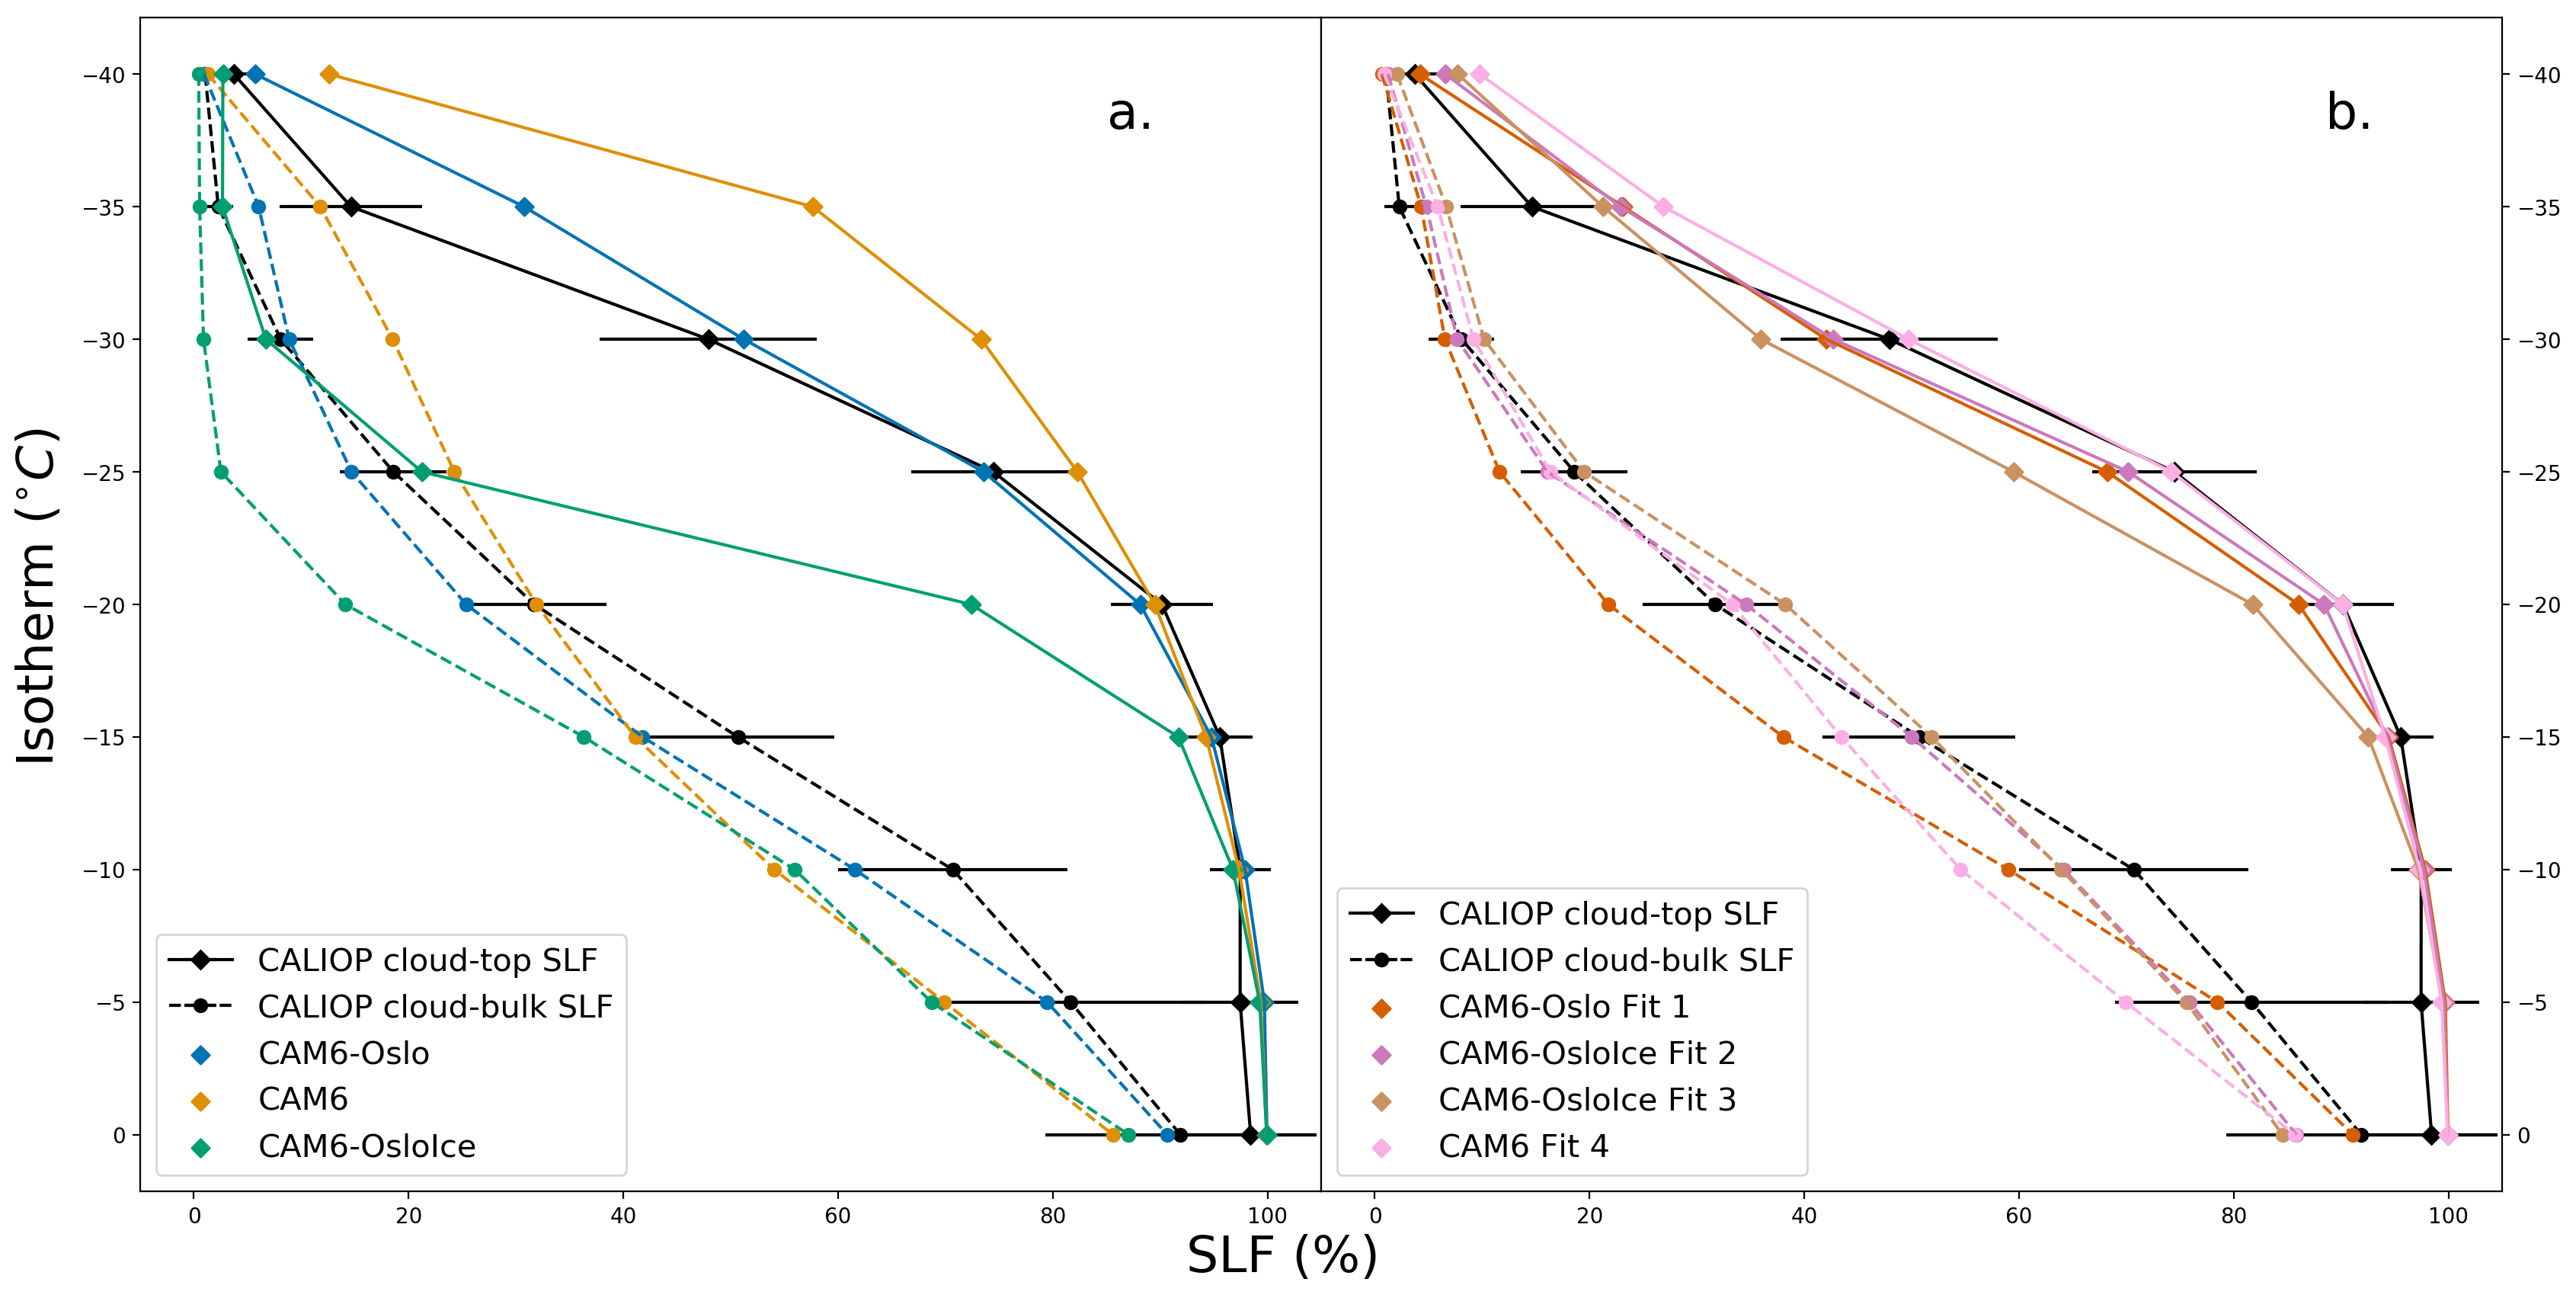

In [6]:
# Use different colors for the two subplots. Use the Seaborn colorblind palette (really pretty!)
plt.style.use('default')
basemetric_slf.colors = sns.color_palette("colorblind")[:3] 
fitmetric_slf.colors = sns.color_palette("colorblind")[3:]

fig,axs = plt.subplots(nrows=1,ncols=2)#,sharey=True)
fig.set_figheight(10)
fig.set_figwidth(20)
fig.set_dpi(200)

# axs[0].invert_yaxis()
o = basemetric_slf.plot_isos_all(ax=axs[0])

# axs[1].invert_yaxis()
oo = fitmetric_slf.plot_isos_all(ax=axs[1])

fig.subplots_adjust(wspace=0.0)

axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[0].set_title('')
axs[1].set_title('')
# axs[1].set_yticks(np.arange(-40,0,5),' ')
# axs[1].get_yaxis().set_ticks([])
axs[1].yaxis.tick_right()
# axs[1].set_yticklabels([])

# handles, labels = axs[1].get_legend_handles_labels()
# axs[1].legend(handles, labels, loc = 'lower left')

fig.text(0.1, 0.5, r'Isotherm ($^{\circ}C$)', va='bottom', ha='center', rotation='vertical', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.5, 0.05, 'SLF (%)', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

# fig.text(0.15, 0.2, 'a.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.55, 0.2, 'b.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)

fig.text(0.45, 0.8, 'a.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)
fig.text(0.85, 0.8, 'b.', va='bottom', ha='center', rotation='horizontal', 
         rotation_mode='anchor', fontsize=24)

In [19]:
to_png(fig,"combined_slfcurves_simp")